In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sleep_eeg.utils import load_mq_file
from sleep_eeg.pre_processing.sleep_cycles import assemble_data

In [3]:
data, predictor_groups = assemble_data()
data["lay_awake_time"] = 0.5 * data["lay_awake_time"]
data["sleep_latency"] = 0.5 * data["sleep_latency"]
data["Sleep latency Error"] = np.abs(data["sleep_latency"] - data["mq_1_Sleeplatency"])

In [4]:
predictor_groups.keys()

dict_keys(['durations_latencies', 'changements', 'continuity', 'fourrier', 'resampled_times_series', 'psd', 'age_bmi', 'mq'])

In [5]:
predictor_groups["age_bmi"]

['Age (y)', 'Sex (1=m, 2=f)', 'bmi (kg/m^2)']

In [6]:
data

,bias,stage_0_to_0,stage_1_to_0,stage_0_to_1,stage_2_to_1,stage_3_to_2,stage_2_to_3,stage_5_to_2,stage_2_to_5,stage_0_to_5,...,mq_5_superficial_sleep,mq_6_recovery,mq_7_bad_mood,mq_8_energy,mq_9_tense,mq_10_unconcentrated,Age (y),"Sex (1=m, 2=f)",bmi (kg/m^2),Sleep latency Error
A01_N3,1.0,0,6,3.0,5,28,28,5.0,3.0,3.0,...,39.0,22.0,50.0,46.0,56.0,68.0,25.0,2.0,20.381570,21.0
A01_N4,1.0,0,11,4.0,7,25,25,7.0,4.0,7.0,...,97.0,0.0,89.0,10.0,80.0,86.0,25.0,2.0,20.381570,29.0
A01_N5,1.0,0,10,3.0,11,43,41,3.0,2.0,2.0,...,57.0,44.0,61.0,42.0,56.0,56.0,25.0,2.0,20.381570,2.0
A02_N3,1.0,0,11,3.0,14,27,24,8.0,5.0,3.0,...,59.0,29.0,50.0,50.0,58.0,40.0,30.0,1.0,23.299800,11.0
A02_N4,1.0,0,7,0.0,13,10,9,2.0,1.0,7.0,...,37.0,37.0,33.0,59.0,24.0,33.0,30.0,1.0,23.299800,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B23_N4,1.0,0,7,0.0,9,29,29,8.0,4.0,5.0,...,34.0,50.0,42.0,56.0,39.0,37.0,21.0,1.0,25.057360,3.0
B23_N5,1.0,0,7,0.0,14,21,21,10.0,5.0,4.0,...,36.0,30.0,43.0,50.0,36.0,50.0,21.0,1.0,25.057360,3.5
B24_N3,1.0,0,15,3.0,15,39,39,8.0,4.0,7.0,...,50.0,54.0,34.0,54.0,42.0,47.0,27.0,1.0,23.671254,7.0
B24_N4,1.0,0,22,5.0,17,32,31,7.0,1.0,15.0,...,54.0,39.0,31.0,51.0,38.0,44.0,27.0,1.0,23.671254,0.5


In [7]:
data.columns[:-10]

Index(['bias', 'stage_0_to_0', 'stage_1_to_0', 'stage_0_to_1', 'stage_2_to_1',
       'stage_3_to_2', 'stage_2_to_3', 'stage_5_to_2', 'stage_2_to_5',
       'stage_0_to_5',
       ...
       'stage_5_psd_f123', 'stage_5_psd_f124', 'stage_5_psd_f125',
       'stage_5_psd_f126', 'stage_5_psd_f127', 'stage_5_psd_f128',
       'mq_1_Sleeplatency', 'mq_2_times_awake', 'mq_3_time_lay_awake',
       'mq_4_calm_sleep'],
      dtype='object', length=1581)

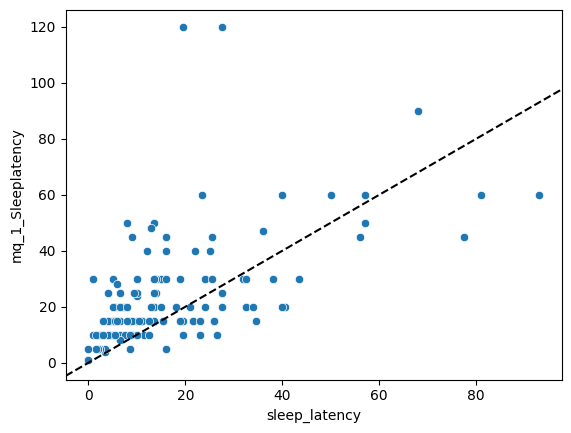

In [9]:
sns.scatterplot(
    data,
    x="sleep_latency",
    y="mq_1_Sleeplatency",
)
plt.axline((0, 0), slope=1, color="black", linestyle="--")

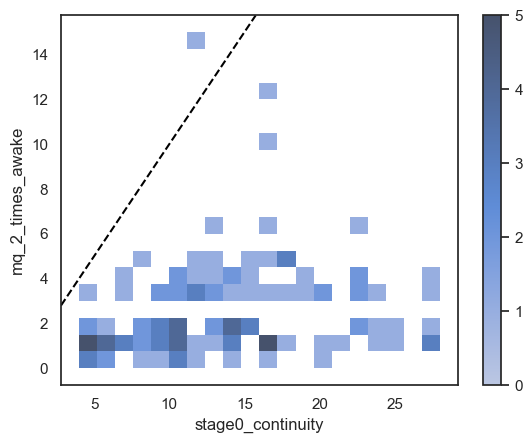

In [12]:
sns.set_theme(style="white")
sns.histplot(data, y="mq_2_times_awake", x="stage0_continuity", bins=20, cbar=True)
# sns.histplot(data,
#     y="mq_2_times_awake",
#     x="stage0_continuity", bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(data,
#     y="mq_2_times_awake",
#     x="stage0_continuity", levels=5, color="w", linewidths=1)

# sns.scatterplot(
#     data,
#     y="mq_2_times_awake",
#     x="stage0_continuity",
# )
plt.axline((10, 10), slope=1, color="black", linestyle="--")

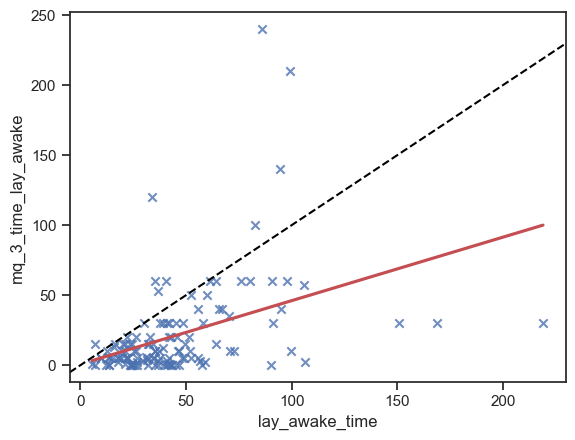

In [11]:
sns.set_theme(style="ticks")
# sns.kdeplot(
#     data,
#     y="mq_3_time_lay_awake",
#     x="lay_awake_time",
#     cmap="Reds",
#     fill=True,
#     # shade_lowest=True,
#     cbar=True
# )
sns.regplot(
    data,
    y="mq_3_time_lay_awake",
    x="lay_awake_time",
    ci=None,
    line_kws=dict(color="r"),
    marker="x",
)
plt.axline((50, 50), slope=1, color="black", linestyle="--")